# Matplotlib 2 : Adding Subplots and Object-oriented approach

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

## Working with multiple figures and axes
matplotlib.pyplot, has the concept of the current figure and the current axes. All plotting commands apply to the current axes. Normally, you don’t have to worry about this, because it is all taken care of behind the scenes.

### Figure
This is the entire window where one or more subplots live. A Figure object (new window) is created with the figure() command.

### Axes
This is an object representing a subplot (which you might casually call a “plot” or “graph”) which contains axes (here, plural of axis), ticks, lines, points, text, etc.

### plot()
This is a command that draws points or lines and returns a list of Line2D objects. One sublety is that plot() will automatically call figure() and/or subplot() if neccesary to create the underlying Figure and Axes objects.

### subplot()
This is a command that creates and returns a new subplot (Axes) object which will be used for subsequent plotting commands.

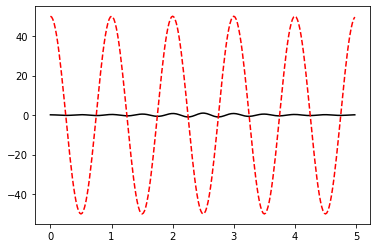

In [4]:
# From what we know till now
plt.plot(t, f(t), 'k')
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--')

The first (black) graph isn't looking good.  
So, what if you want to the separate graphs?

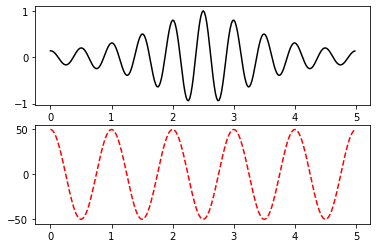

In [5]:
plt.subplot(2, 1, 1) # (2, 1, 1) implies first axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, f(t), 'k') # plotting in first axes because it is the current axes

plt.subplot(2, 1, 2) # (2, 1, 2) implies second axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--') # plotting in second axes because it is the current axes

subplot() helps in forming grids of similiar Axes.

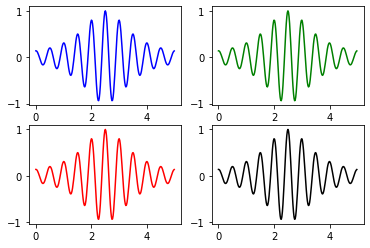

In [6]:
plt.subplot(2, 2, 1) # 1st element of 2x2 grid - 1st row, 1st col
plt.plot(t, f(t), 'b') # Blue graph 

plt.subplot(2, 2, 2) # 2nd element of 2x2 grid - 1st row, 2st col
plt.plot(t, f(t), 'g') # Green graph

plt.subplot(2, 2, 3) # 3rd element of 2x2 grid - 2st row, 1st col
plt.plot(t, f(t), 'r') # Red graph

plt.subplot(2, 2, 4) # 4th element of 2x2 grid - 2st row, 2st col
plt.plot(t, f(t), 'k') # Black graph

## Object Oriented approach to Plotting

The object-oriented API
At its core, Matplotlib is object-oriented. We recommend directly working with the objects, if you need more control and customization of your plots.

Further reading:
[matplotlib.axes.Axes](https://matplotlib.org/api/axes_api.html#matplotlib-axes) and [matplotlib.figure.Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib-figure-figure) for an overview of plotting functions.

### add_subplot() - Substitute of subplot()

(5, 0)

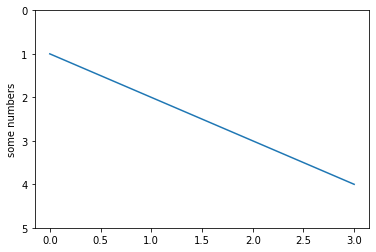

In [7]:
plt.subplot(1, 1, 1)
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.ylim(5, 0) # To invert y-axis

To allow more customization, we need to move to a more object-based way to make the plots. This method involves storing various elements of the of the plots in variables (these are objects in object-oriented terminology). The above example becomes:

(5, 0)

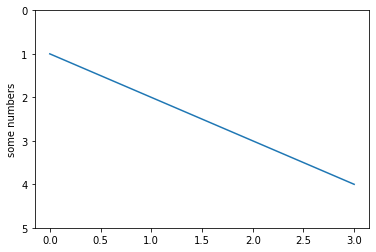

In [8]:
fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot([1, 2, 3, 4])
ax.set_ylabel('some numbers')
ax.set_ylim(5, 0) # To invert y-axis

This method is more convenient for advanced plots, and we will be adopting this for the current workshop. One of the biggest advantages of using this method is that it allows users to easily handle multiple figures/axes without getting confused as to which one is currently active.

Following defines two figures, one with two sets of axes, and one with one set of axes.
Subsequently, use ax1.plot(...) to plot to the subplot in fig1, and ax2.plot(...) and ax3.plot(...) to plot in the top and bottom subplots of fig2 respectively.

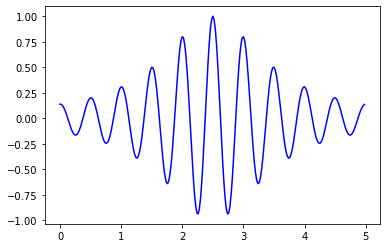

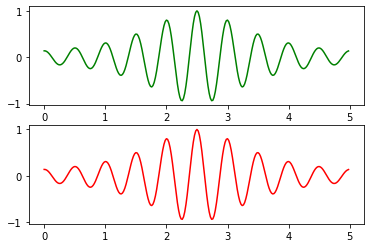

In [9]:
fig1 = plt.figure()
fig2 = plt.figure() # Defined all the figures simultaneously

ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(2, 1, 1)
ax3 = fig2.add_subplot(2, 1, 2)

ax1.plot(t, f(t), 'b') # Blue Graph
ax2.plot(t, f(t), 'g') # Green Graph
ax3.plot(t, f(t), 'r') # Red Graph

### subplots()

You can create all axes in one go.  
subplots() returns figure and multidimenionsal numpy array of Axes 

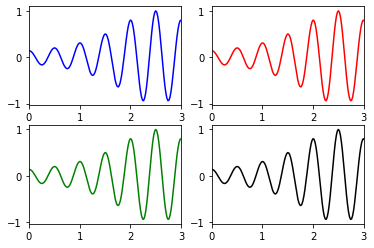

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2) # axes is the multidimensional numpy array of Axes.

axes[0,0].plot(t, f(t), 'b') # Blue graph
axes[1,0].plot(t, f(t), 'g') # Green graph
axes[0,1].plot(t, f(t), 'r') # Red graph
axes[1,1].plot(t, f(t), 'k') # Black graph

# To iterate over all items (along rows) in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    ax.set(xlim=[0, 3])

Try the following to see how exactly 'flat' works

In [ ]:
x = np.arange(1, 7).reshape(3, 2) # This creates a multidimensional array.
# x = np.arange(1, 13).reshape(3,2,2) # Also try this.
print(x)
print(type(x))
for i in x.flat:
    print(i)

'sharex' and 'sharey' are useful parameters to subplots()

Text(0.5, 0.98, '5th')

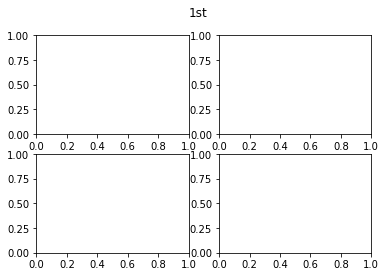

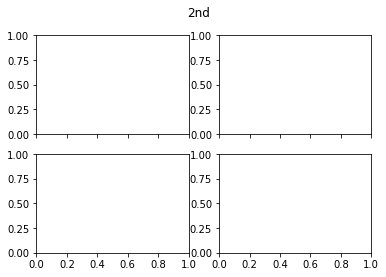

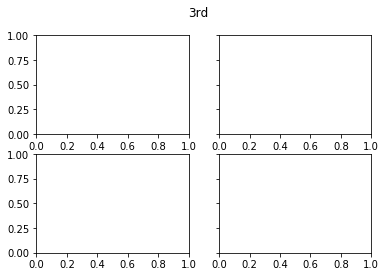

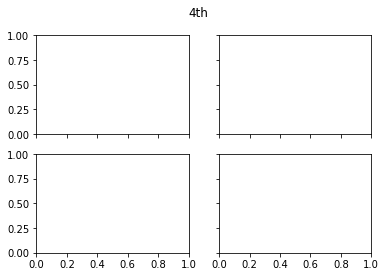

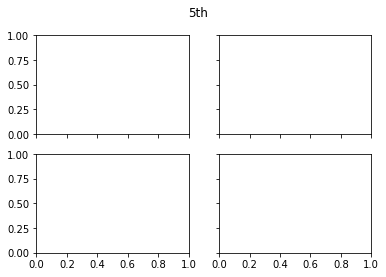

In [12]:
fig1, axes1 = plt.subplots(2, 2)

# Share a X axis with each column of subplots
fig2, axes2 = plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
fig3, axes3 = plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
fig4, axes4 = plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
fig5, axes5 = plt.subplots(2, 2, sharex=True, sharey=True)

# Setting title of figure is using suptitle()
fig1.suptitle('1st')
fig2.suptitle('2nd')
fig3.suptitle('3rd')
fig4.suptitle('4th')
fig5.suptitle('5th')

plt.subplots() is limited to m x n grids only. If you want to have different number of cells in each row, fig.add_subplot() is preferred.  
The following example shows how.

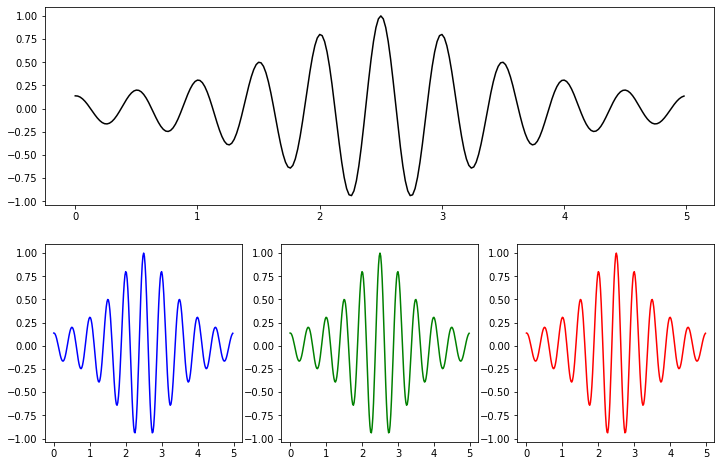

In [11]:
fig = plt.figure(figsize=(12,8)) # Try plt.figure? to know more about the parameters of creating a new figure.

ax1 = fig.add_subplot(2, 1, 1) # Equivalent to 1st element of 2x1 matrix
ax2 = fig.add_subplot(2, 3, 4) # Equivalent to 4th element of 2x3 matrix
ax3 = fig.add_subplot(2, 3, 5) # Equivalent to 5th element of 2x3 matrix
ax4 = fig.add_subplot(2, 3, 6) # Equivalent to 6th element of 2x3 matrix

ax1.plot(t, f(t), 'k') # Black graph 
ax2.plot(t, f(t), 'b') # Blue graph 
ax3.plot(t, f(t), 'g') # Green graph 
ax4.plot(t, f(t), 'r') # Red graph

If you want to exchange the left and right graphs. All you need to do is change the axes they are plotted.  
If you wish to change to the size, shape and position of graphs, you only need to change the add_subplot() parameters.

### Twin Axes

It is considered useful to have dual x or y axes in a figure. Moreso, when plotting curves with different units together.  
Matplotlib supports this with the twinx() and twiny() functions.

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
# fig.add_subplot(111) gives same result as long as all the three are single digit integer

ax2 = ax1.twinx()

ts = np.linspace(0, 10, 100)
ax1.plot(ts, ts ** 2, 'b-')
ax2.plot(ts, 1000 / (ts + 1), 'r-')

# set_ylabel sets the properties of y-axis label, set_xlabel sets the properties of x-axis label
ax1.set_ylabel('Density (cgs)', color='blue')
ax2.set_ylabel('Temperature (K)', color='red')
ax1.set_xlabel('Time (s)')

### Gridspec

add_subplot() is a powerful tool but you can't make an element which covers 2/3rd of a row.  
For that add_subplot() is used in association with gridspec.

Text(0.5, 1.0, 'gs[1, -2]')

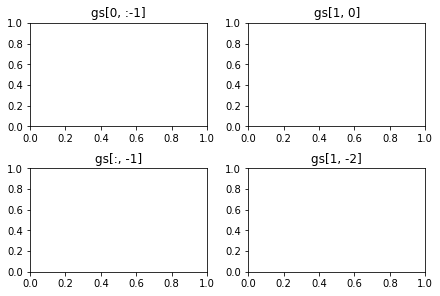

In [15]:
fig = plt.figure(constrained_layout=True)
# Remove the constrained_layout part and see the difference.

gs = fig.add_gridspec(2, 2) # Creates 6 elements in form of 2x3 grid

# Merges 1st element(0,0), 2nd element(0,1)
ax2 = fig.add_subplot(gs[0,0])
# [0, :-1] implies 1st row and all columns before last (Recall slicing of list)
ax2.set_title('gs[0, :-1]')

# Merges 3rd element(0,2), 6th element(1,2)
ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('gs[:, -1]')

# Only 4th element(1,0)
ax4 = fig.add_subplot(gs[0, 1])
ax4.set_title('gs[1, 0]')

# Only 5th element(1,1)
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('gs[1, -2]')

Another advantage of gridspec is that you can set ratio of width and height.

In [ ]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(spec[row, col])
        ax.set(title=str(row*3 + col))

### add_axes()

We see that gridspec is very useful but what if our Axes pattern isn't grid like (like inset)  
fig.add_axes() comes to rescue.  
It takes a list of four elements as the parameter [x, y, width, height] where (x,y) is w.r.t the bottom left corner of the figure.

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax2 = fig.add_axes([0.6, 0.6, 0.16, 0.16])
ax3 = fig.add_axes([0.2, 0.2, 0.3, 0.3])

ax1.set(title = 'Axes1')
ax2.set(title = 'Axes2')
ax3.set(title = 'Axes3')

plt.plot() returns a Line2D object  
Try plt.plot? to find more parameters.

plt.subplot(), fig.add_subplot(), fig.add_axes() return an Axes object  
Try plt.subplot? to find more parameters.

## Your assignment ...

... should you choose to accept it will be the following:

As you may already know, stars go through several stages in its life cycle as they evolve. They spend much of their time in the 'main sequence' where they burn hydrogen at the core (like our Sun currently) and once they exhaust all the core hydrogen they evolve into red giants and then depending on their initial masses, follow different paths of evolution (read more on stellar evolution [here](https://en.wikipedia.org/wiki/Stellar_evolution)) 

Now as a star evolves through all these stages, its temperature changes and so does its luminosity. A nice way therefore, to study stars, is to plot their luminosity and temperature at every stage. Such a plot is called a [Hertzsprung–Russell (HR) diagram
](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram).

But obviously we cannot look at a single star and study its evolution as a star takes billions of years to evolve, so we study stars at different stages of their evolution. A very good place to find stars of different ages together, is star clusters and particularly globular clusters as they tend to be quite old and hence contain stars in almost every stage. So we take all the stars in the cluster, and plot their HR diagram.

Now in the diagram itself, temperature is plotted on the x-axis, but in reverse, i.e, temperature decreases on moving away from origin on the x axis, while luminosity is plotted on the y axis as usual. But instead of plotting temperature, we plot something called as '[color](https://en.wikipedia.org/wiki/Color_index)', which is the difference between the magnitudes of the star directly observed in different wavelength bands. This color turns out to increase as temperature decreases. Similarly for the luminosity, we plot the magnitude in a given wavelength band, and as we have seen before, higher the luminosity, lower the magnitude.


#### Your task:

- To plot the HR diagram (or rather the color-magnitude diagram) of the given cluster, in different color bands. (See explanation below)
- Once you have made 4 such plots, put them in a 2 by 2 subplot grid with both the x and y axes shared and each subplot and the axes labeled.

The data has been provided to you in the 'NGC5272.csv', which contains data for the globular cluster [M3](https://en.wikipedia.org/wiki/Messier_3). The columns indicate different wavelength bands, and your job is to plot HR diagrams for pairwise filters, sequentially, i.e., F275W vs F275W-F336W, F336W vs F336W-F438W, F438W vs F438W-F606W and F606W vs F606W-F814W. The last column gives the probability of individual stars (you have encountered this before; -1.0 indicates data for the given star is not available). Use this probability to filter out low probability stars, and ensure the orientation of the axes based on the properties of the HR diagram mentioned above.

Based on your plots try to reason which color is the best to study the cluster in, and why.